## Tech Minds: Analyzing Mental Health Trends in Technology Professionals

Importing Libraries

In [5]:
import numpy as np  # linear algebra
import pandas as pd  # data processing
from sklearn.preprocessing import MinMaxScaler  # for scaling

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import plotly.graph_objects as go

import matplotlib.style as style
style.use('seaborn-v0_8-dark')  # Use a valid style name
style.use('fivethirtyeight')  # Use another valid style name

## 3. Data Preperation(contd.)

In [6]:
from google.colab import files

# Upload the dataset manually
uploaded = files.upload()

# Load dataset (assuming the user uploaded the correct file)
cleaned_survey = list(uploaded.keys())[0]
data = pd.read_csv(cleaned_survey)

Saving clean_data.csv to clean_data.csv


3.2 Visualizations

3.2.1 How often do employers provide mental health benefits?

In [7]:
data.benefits.value_counts()

,count
benefits,
Yes,473
Don't know,408
No,372


In [8]:
colors = ['gold', 'mediumturquoise', 'darkorange']

labels = ["Yes","Don't know","No"]
values = [477, 408, 374]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent')])
fig.update_traces(title='Does your employer provides mental health benefits?', hoverinfo='label+percent', textfont_size=10,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.show()

Based on this pie chart, it is evident that the majority of employers provide mental health benefits. However, it is also noticeable that a significant percentage of employers are unaware of whether their company offers such benefits or not.

3.2.2 Do employers talk about employee wellness programs?

In [9]:
data.wellness_program.value_counts()

,count
wellness_program,
No,839
Yes,227
Don't know,187


In [10]:
import plotly.graph_objects as go

colors = ['lightgreen', 'yellow', 'red']

labels = ["Yes","Don't know","No"]
values = [229, 188, 842]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent')])
fig.update_traces(title='Has your employer ever discussed mental health as part of an employee wellness program??', hoverinfo='label+percent', textfont_size=10,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

This chart shows that a large percentage of employers do not even discuss mental health as part of an employee wellness program.

3.2.3 With whom do employees share mental health-related issues?

In [11]:
data.mental_health_interview.value_counts()

,count
mental_health_interview,
No,1005
Maybe,207
Yes,41


In [12]:
data.supervisor.value_counts()

,count
supervisor,
Yes,513
No,390
Some of them,350


In [13]:
data.coworkers.value_counts()

,count
coworkers,
Some of them,772
No,258
Yes,223


In [14]:
import plotly.graph_objects as go
answer=['Yes', 'No', 'Maybe']
answer2=['Yes', "No", 'Some of them']

fig = go.Figure(data=[
    go.Bar(name='Employer', x=answer, y=[44, 1008, 207]),
    go.Bar(name='Supervisor', x=answer2, y=[516, 393, 350]),
    go.Bar(name='CoWorkers', x=answer2, y= [225, 260, 774])
])
# Change the bar mode
fig.update_layout(barmode='group', title_text='To whom will you go to discuss about your mental health?')
fig.show()

It is evident from the figure above that employees are least likely to discuss mental health problems with their employers. However, they are more comfortable discussing these issues with their supervisors and coworkers. In some companies, employees have good relationships with certain coworkers and supervisors, making them more likely to discuss such situations with those individuals.

3.2.4 How much does mental health affect work?

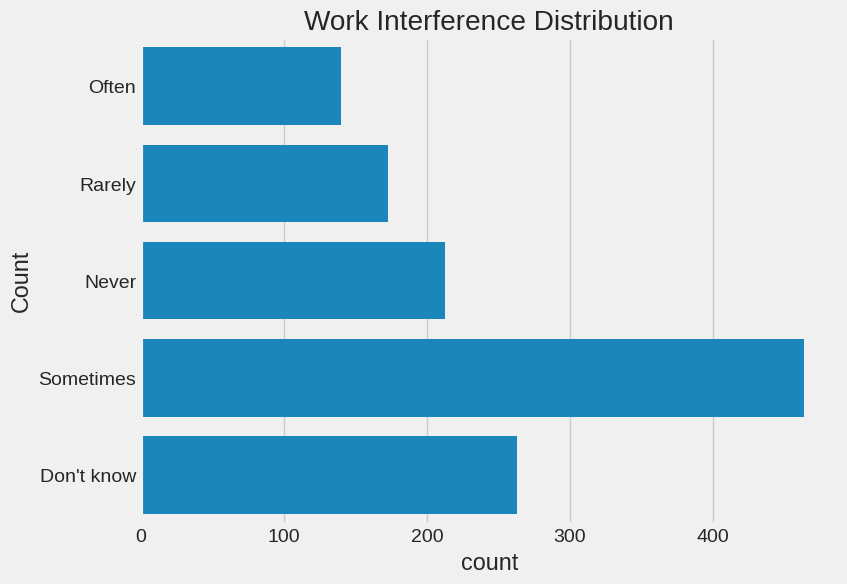

In [15]:
fig,ax =plt.subplots(figsize=(8,6))
sns.countplot(data['work_interfere'].dropna(),ax=ax)
plt.title('Work Interference Distribution')
plt.ylabel('Count')
plt.show();

For most employees, mental health largely affects their work life.

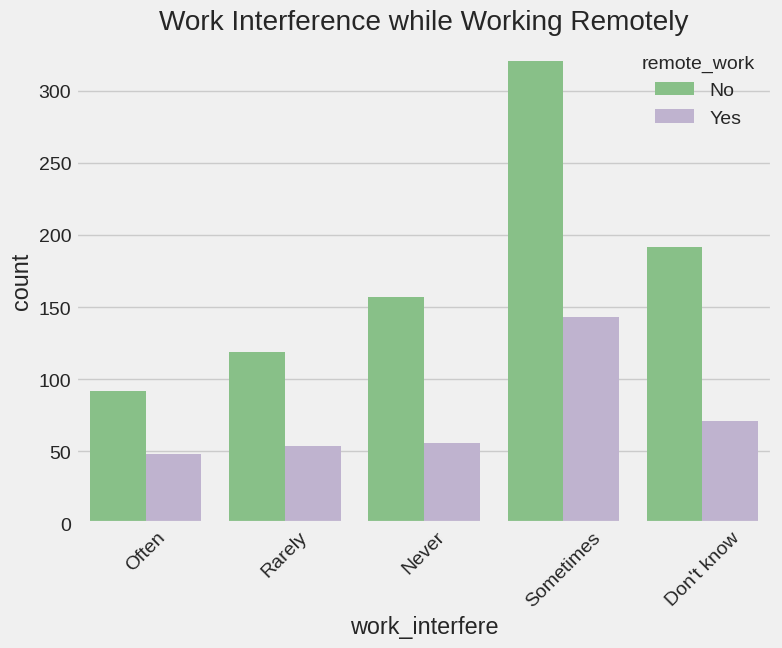

In [16]:
fig,ax = plt.subplots(figsize=(8,6))
sns.countplot(data = data,x = 'work_interfere', hue ='remote_work',ax=ax, palette="Accent")
ticks = plt.setp(ax.get_xticklabels(),rotation=45)
plt.title('Work Interference while Working Remotely')
plt.show();

Remote work seems to mitigate the impact of mental health issues on work. This may be because employees working from home or another place of their choice have more control over their mental space.

3.2.5 Which age group is most affected by mental health issues?

In [18]:
import pandas as pd

# Assuming 'data' is your DataFrame

# Fill missing 'Age' with the median
data['Age'].fillna(data['Age'].median(), inplace=True)

# Fill values < 18 with the median
data.loc[data['Age'] < 18, 'Age'] = data['Age'].median()

# Fill values > 120 with the median
data.loc[data['Age'] > 120, 'Age'] = data['Age'].median()

# Create age ranges
data['age_range'] = pd.cut(data['Age'], [0, 20, 30, 65, 100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

<ipython-input-18-c6d54e06aab3>:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





Encoding the data for further use

In [19]:
#Encoding data
labelDict = {}
for feature in data:
    le = preprocessing.LabelEncoder()
    le.fit(data[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    data[feature] = le.transform(data[feature])

    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] = labelValue

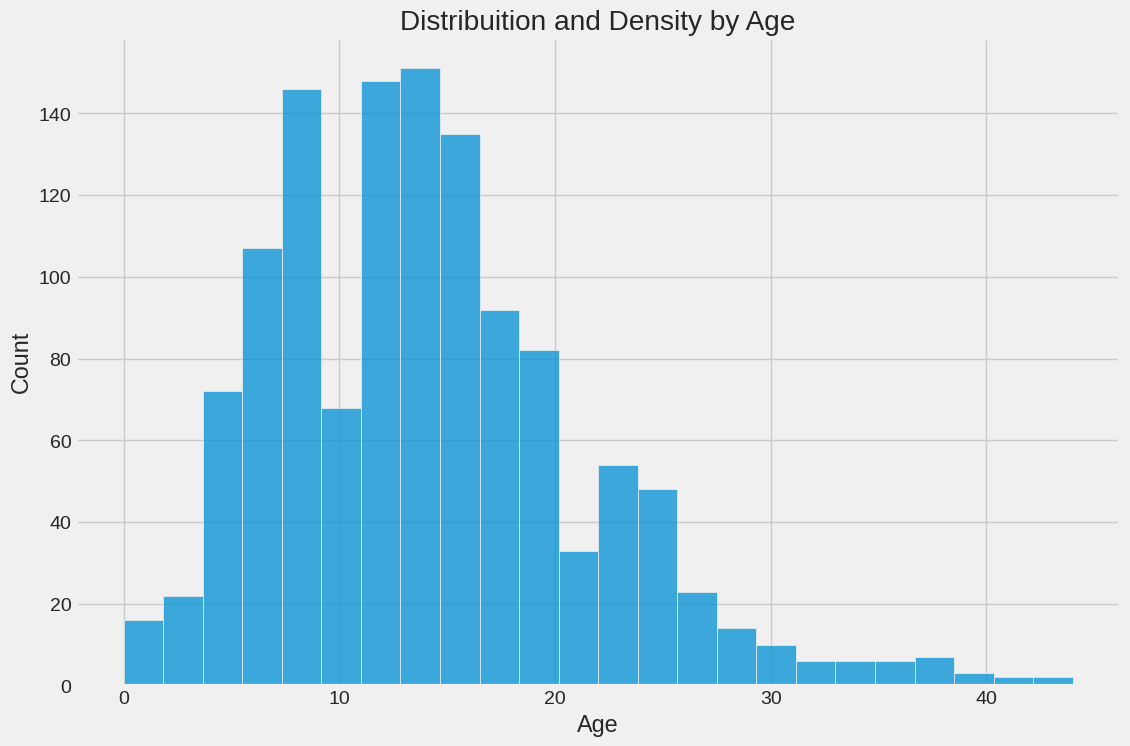

In [25]:
plt.figure(figsize=(12,8))
sns.histplot(data["Age"], bins=24)
plt.title("Distribuition and Density by Age")
plt.xlabel("Age")
plt.show();

<Figure size 1200x800 with 0 Axes>

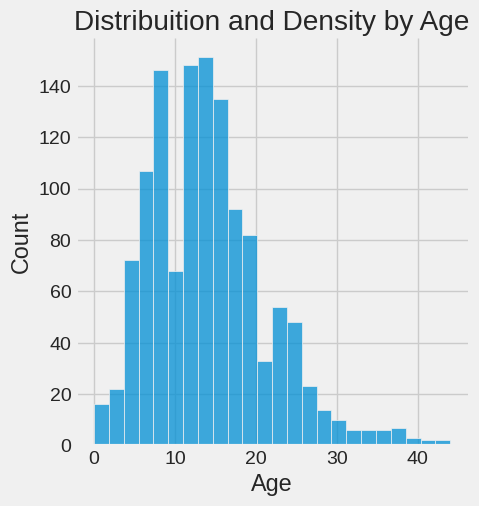

In [26]:
plt.figure(figsize=(12,8))
sns.displot(data["Age"], bins=24)
plt.title("Distribuition and Density by Age")
plt.xlabel("Age")
plt.show();

Individuals in their twenties are the most likely to experience mental health issues.

In [29]:
# Scaling the Age variable since the range of its values is very different from other variables
scaler = MinMaxScaler()
data['Age'] = scaler.fit_transform(data[['Age']])
data.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,0.431818,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,0.590909,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,0.318182,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,0.295455,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,0.295455,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2


<Figure size 1200x800 with 0 Axes>

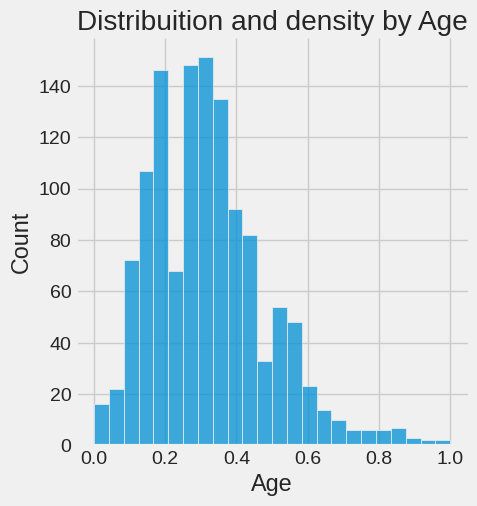

In [31]:
# After Scaling
plt.figure(figsize=(12,8))
sns.displot(data["Age"], bins=24)
plt.title("Distribuition and density by Age")
plt.xlabel("Age")
plt.show();

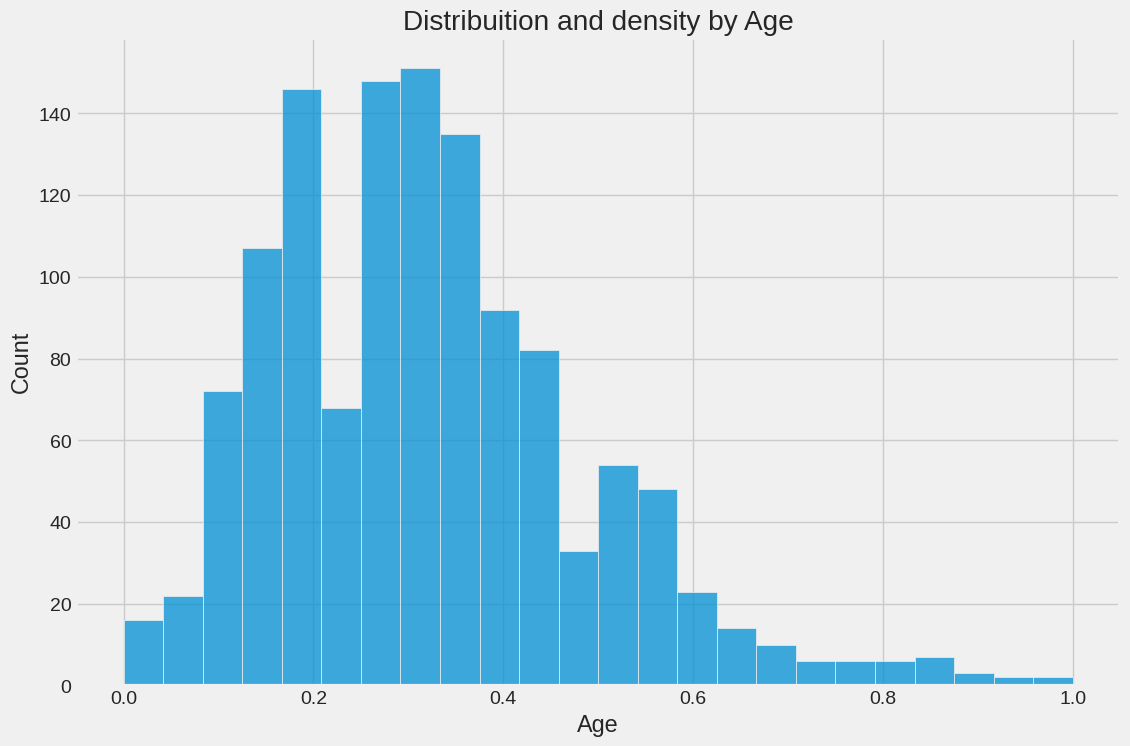

In [32]:
# After Scaling
plt.figure(figsize=(12,8))
sns.histplot(data["Age"], bins=24)
plt.title("Distribuition and density by Age")
plt.xlabel("Age")
plt.show();

3.2.6 Distribution of Probabilities of Different Factors Based on an Individual's Gender

3.2.6.1 Treatment

<ipython-input-33-9b560bec86ff>:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



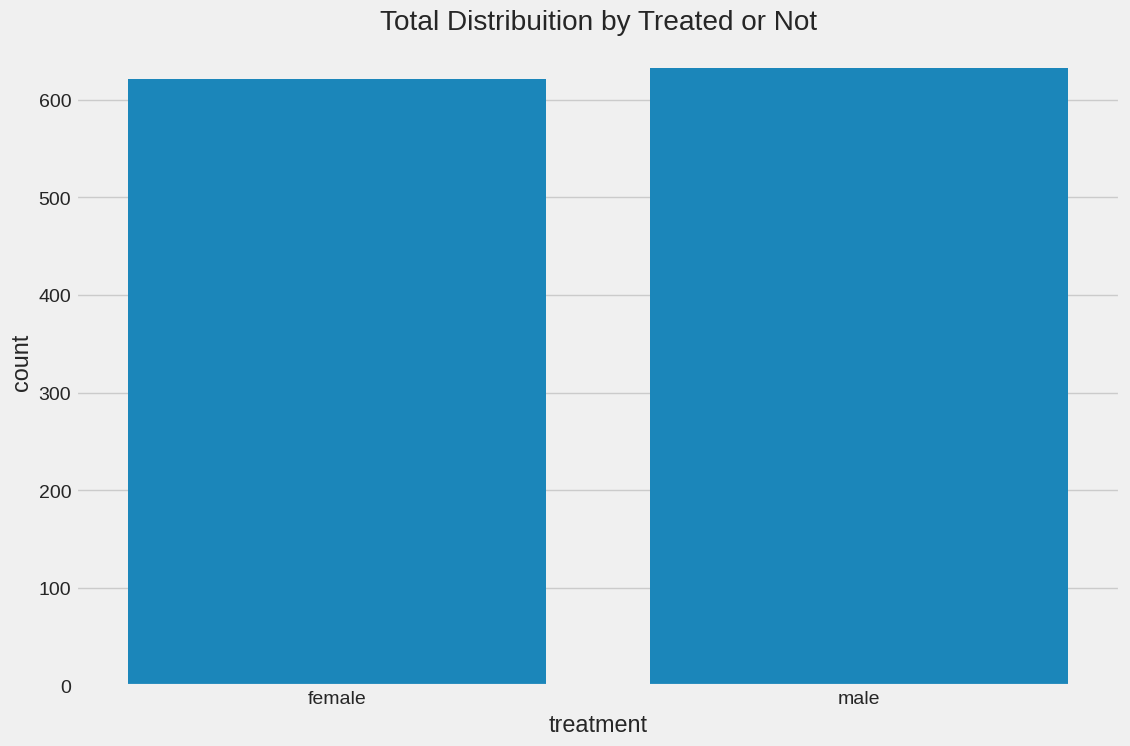

In [33]:
plt.figure(figsize=(12,8))
labels = labelDict['label_Gender']
g = sns.countplot(x="treatment", data=data)
g.set_xticklabels(labels)

plt.title('Total Distribuition by Treated or Not');

Men are mostly likely to get treatment for mental health.

3.2.6.2 Age Groups

<ipython-input-34-44a037eb0b1b>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




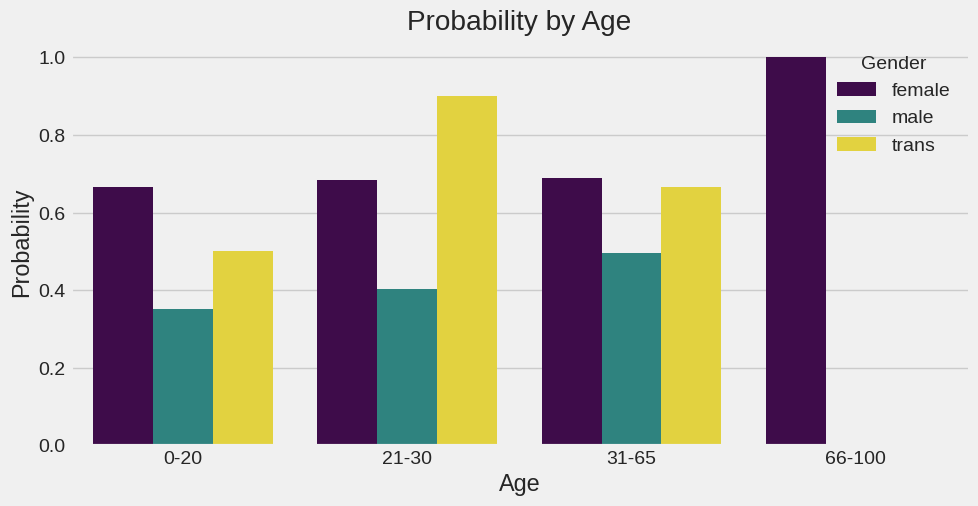

In [34]:
o = labelDict['label_age_range']

g = sns.catplot(x="age_range", y="treatment", hue="Gender",
                data=data, kind="bar",  ci=None, height=5, aspect=2, legend_out = False, palette = 'viridis')
g.set_xticklabels(o)

plt.title('Probability by Age')
plt.ylabel('Probability')
plt.xlabel('Age')
# replace legend labels

new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

plt.show();

Transgender individuals in the age group of 21-30, as well as other age groups, are facing mental health issues in the workplace. There appears to be an outlier in the age range of 66-100 for females, with a probability of 1.

3.2.6.3 Family History



<ipython-input-36-b4c7c8c285bd>:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




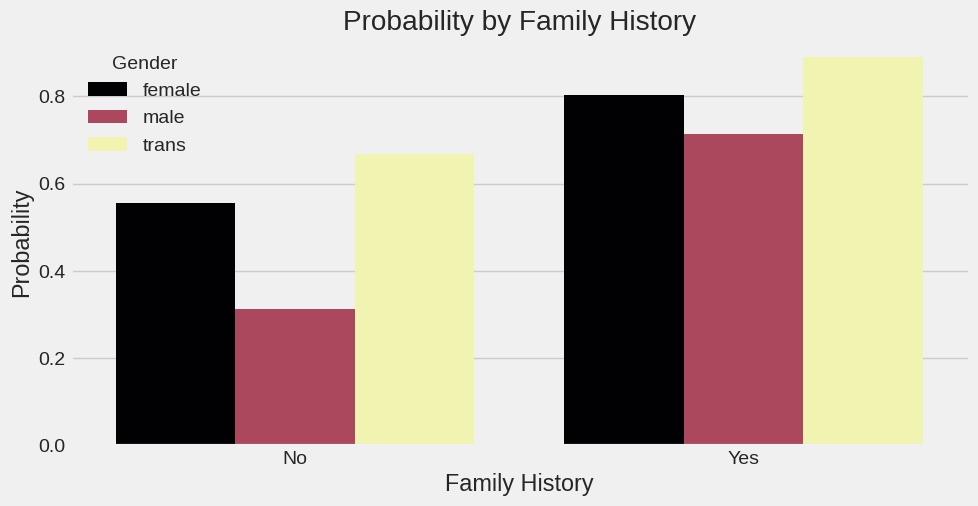

In [36]:
o = labelDict['label_family_history']
g = sns.catplot(x="family_history", y="treatment", hue="Gender",
                data=data, kind="bar", ci=None, height=5, aspect=2, legend_out = False, palette='inferno')
g.set_xticklabels(o)
plt.title('Probability by Family History')
plt.ylabel('Probability')
plt.xlabel('Family History')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

plt.show();

Again, transgender individuals with a family history of mental health issues seem to be affected.

3.2.6.4 Care Options

<ipython-input-37-8e2dd9c9b1cd>:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




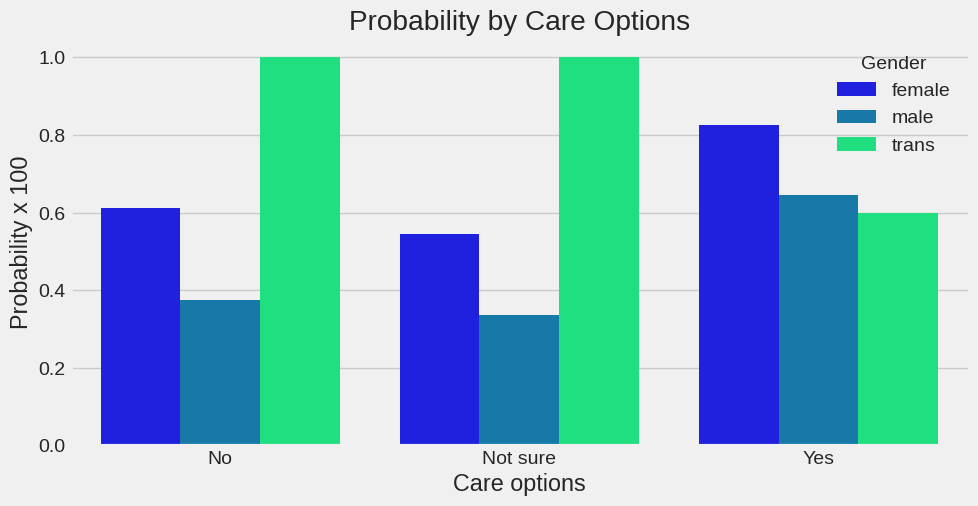

In [37]:
o = labelDict['label_care_options']
g = sns.catplot(x="care_options", y="treatment", hue="Gender",
                data=data, kind="bar", ci=None, height=5, aspect=2, legend_out = False, palette = 'winter')
g.set_xticklabels(o)
plt.title('Probability by Care Options')
plt.ylabel('Probability x 100')
plt.xlabel('Care options')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

plt.show();

There seems to be a stark contrast between transgender individuals and others in terms of the availability and awareness of care options in the workplace.

3.2.6.5 Benefits

<ipython-input-38-afcb8590b743>:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




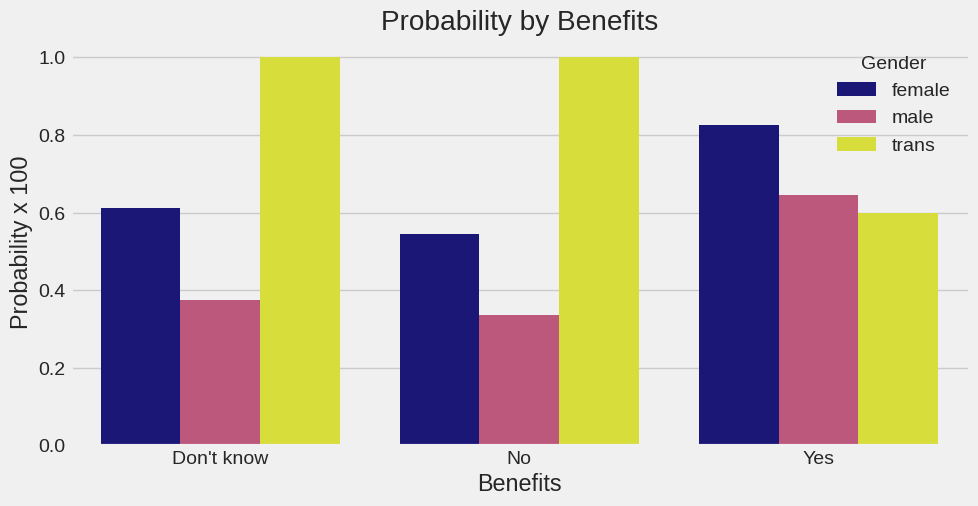

In [38]:
o = labelDict['label_benefits']
g = sns.catplot(x="care_options", y="treatment", hue="Gender",
                data=data, kind="bar", ci=None, height=5, aspect=2, legend_out = False, palette='plasma')
g.set_xticklabels(o)
plt.title('Probability by Benefits')
plt.ylabel('Probability x 100')
plt.xlabel('Benefits')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

plt.show();

Benefits for transgender individuals seem to be much less available.

3.2.7 Correlation Matrix

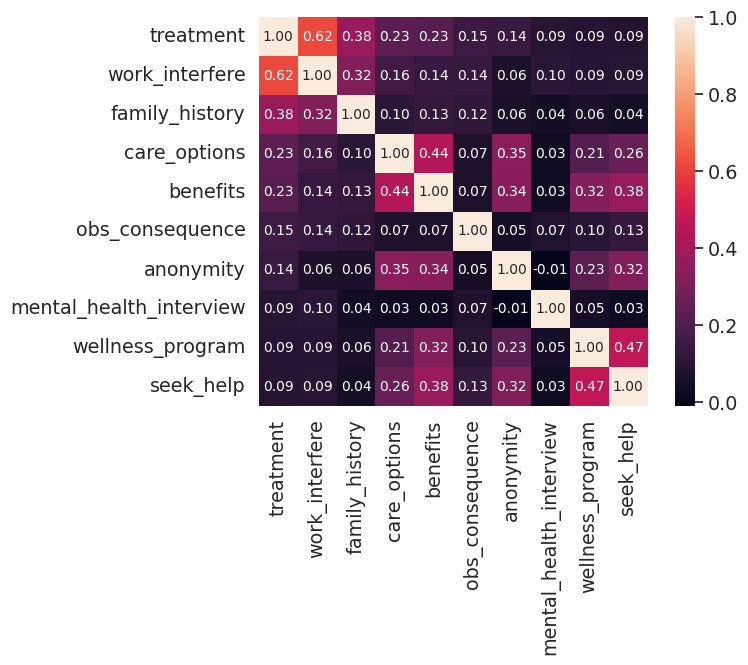

In [40]:
# correlation matrix with tratment as target variable
corrmat = data.corr()
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [41]:
# Copying encoded data for modelling
data_encoded = data.copy()

# Saving to csv file
data_encoded.to_csv('data_for_modelling.csv', index=False)